<a href="https://colab.research.google.com/github/saimanit/MACHINE-LEARNIG-PROJECT/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                   ubit:bungata
                                                   ubit: saimanit

## FAKE NEWS DETECTION
The Project focuses on developing a fake news detection system employing various neural network architectures, including Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM), and Bidirectional LSTM. The model utilizes one-hot encoding for text data representation. This approach aims to distinguish between authentic and fabricated news effectively.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-bacc3c59c823>:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("/content/WELFake_Dataset.csv", error_bad_lines=False, warn_bad_lines=True)
<ipython-input-9-bacc3c59c823>:21: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("/content/WELFake_Dataset.csv", error_bad_lines=False, warn_bad_lines=True)
<ipython-input-9-bacc3c59c823>:22: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test = pd.read_csv("/content/WELFake_Dataset.csv", error_bad_lines=False, warn_bad_lines=True)
<ipython-input-9-bacc3c59c823>:22: FutureWarning: The warn_bad_line

Epoch 1/20
1498/1498 [==============================] - 42s 27ms/step - loss: 0.2949 - accuracy: 0.8698 - val_loss: 0.2403 - val_accuracy: 0.9018
Epoch 2/20
1498/1498 [==============================] - 25s 17ms/step - loss: 0.1717 - accuracy: 0.9317 - val_loss: 0.2498 - val_accuracy: 0.9011
Epoch 3/20
1498/1498 [==============================] - 26s 17ms/step - loss: 0.1067 - accuracy: 0.9605 - val_loss: 0.2876 - val_accuracy: 0.8925
Epoch 4/20
1498/1498 [==============================] - 27s 18ms/step - loss: 0.0694 - accuracy: 0.9753 - val_loss: 0.3489 - val_accuracy: 0.8900
Epoch 5/20
1498/1498 [==============================] - 25s 17ms/step - loss: 0.0517 - accuracy: 0.9821 - val_loss: 0.4367 - val_accuracy: 0.8702
Epoch 6/20
1498/1498 [==============================] - 26s 17ms/step - loss: 0.0391 - accuracy: 0.9863 - val_loss: 0.4977 - val_accuracy: 0.8835
Epoch 7/20
1498/1498 [==============================] - 26s 17ms/step - loss: 0.0339 - accuracy: 0.9881 - val_loss: 0.4863 -

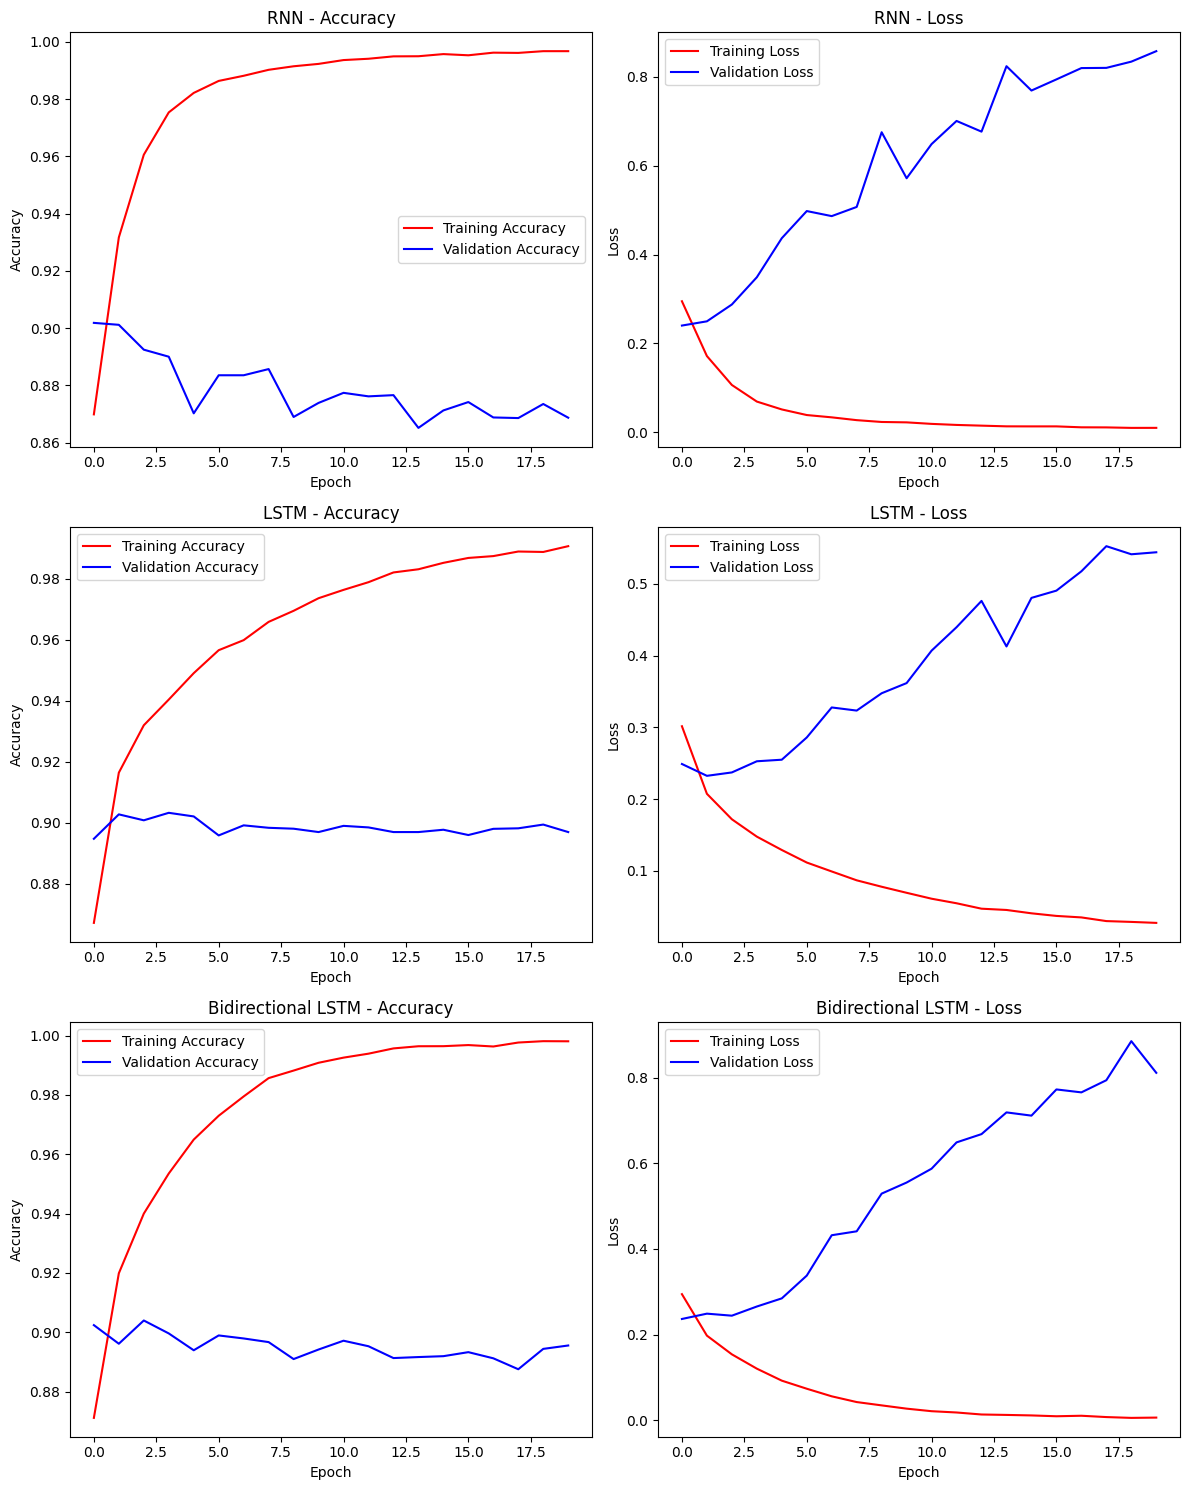

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')


try:
    train = pd.read_csv("/content/WELFake_Dataset.csv", error_bad_lines=False, warn_bad_lines=True)
    test = pd.read_csv("/content/WELFake_Dataset.csv", error_bad_lines=False, warn_bad_lines=True)
except pd.errors.ParserError as e:
    print(f"An error occurred while reading the CSV file: {e}")



# Data Preprocessing
df = train.dropna()
messages = df.copy()
messages.reset_index(inplace=True)
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# One-hot Encoding and Padding
voc_size = 10000
onehot_repr = [one_hot(words, voc_size) for words in corpus]
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)

# Preparing the final datasets
X_final = np.array(embedded_docs)
y_final = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# RNN Model
embedding_vector_features = 40
rnn = Sequential()
rnn.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
rnn.add(SimpleRNN(100))
rnn.add(Dense(1, activation='sigmoid'))
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LSTM Model
lstm = Sequential()
lstm.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
lstm.add(Dropout(0.3))
lstm.add(LSTM(100))
lstm.add(Dropout(0.3))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Bidirectional LSTM Model
bid = Sequential()
bid.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
bid.add(Bidirectional(LSTM(100)))
bid.add(Dropout(0.3))
bid.add(Dense(1, activation='sigmoid'))
bid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the Models
history_rnn = rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
history_lstm = lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
history_bid = bid.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluation and Performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate_model(rnn, X_test, y_test)
evaluate_model(lstm, X_test, y_test)
evaluate_model(bid, X_test, y_test)

# Visualization Function
def plot_model_history(model_histories, model_names):
    num_models = len(model_histories)
    plt.figure(figsize=(12, num_models * 5))

    for idx, history in enumerate(model_histories):
        plt.subplot(num_models, 2, 2 * idx + 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy', c='red')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='blue')
        plt.title(f'{model_names[idx]} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(num_models, 2, 2 * idx + 2)
        plt.plot(history.history['loss'], label='Training Loss', c='red')
        plt.plot(history.history['val_loss'], label='Validation Loss', c='blue')
        plt.title(f'{model_names[idx]} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Model histories and their names
model_histories = [history_rnn, history_lstm, history_bid]
model_names = ['RNN', 'LSTM', 'Bidirectional LSTM']

# Plot the histories
plot_model_history(model_histories, model_names)




In [ ]:
# Evaluate RNN Model
rnn_loss, rnn_accuracy = rnn.evaluate(X_test, y_test)
print(f"RNN Model Accuracy: {rnn_accuracy * 100:.2f}%")

# Evaluate LSTM Model
lstm_loss, lstm_accuracy = lstm.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

# Evaluate Bidirectional LSTM Model
bid_loss, bid_accuracy = bid.evaluate(X_test, y_test)
print(f"Bidirectional LSTM Model Accuracy: {bid_accuracy * 100:.2f}%")


Dataset and Preprocessing
The dataset, presumably titled "WELFake_Dataset.csv", was attempted to be loaded for both training and testing.
Error handling was implemented to catch and report any CSV parsing issues.
Data Preprocessing:

Null Value Handling: Dropped any rows with missing values to ensure data integrity.


Text Cleaning and Normalization: Applied regular expressions to retain only alphabetic characters and converted all text to lowercase.
Stemming: Employed PorterStemmer to reduce words to their root form.
Stopword Removal: Filtered out English stopwords using NLTK's stopwords library.

One-Hot Encoding and Padding:

Vocabulary Size: Set to 10,000.
One-Hot Representation: Converted the corpus into one-hot encoded vectors.
Sequence Padding: Standardized the length of sequences to 20 using padding.
Created final datasets X_final and y_final for model input and labels.
Split the data into training and testing sets with a test size of 33% and a random state of 42 for reproducibility.

model Evaluation:
 After training, the models are evaluated on a test set. The performance is measured in terms of accuracy, confusion matrix, and classification report. These metrics provide insights into how well the model can predict and differentiate between different classes.

 Accuracy and Metrics:

In the first model, the accuracy is around 86.99%, with a fairly balanced precision, recall, and f1-score for both classes.
The second model shows improved accuracy at around 89.88%, with slightly better precision and recall rates.
The third model has an accuracy of approximately 89.25%, with comparable performance metrics to the second model.

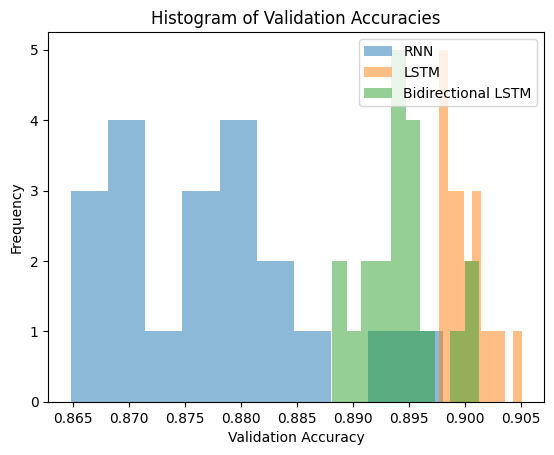

In [ ]:
#'history_rnn', 'history_lstm', 'history_bid' have the history of models after training
# Histogram of validation accuracies
plt.hist(history_rnn.history['val_accuracy'], alpha=0.5, label='RNN')
plt.hist(history_lstm.history['val_accuracy'], alpha=0.5, label='LSTM')
plt.hist(history_bid.history['val_accuracy'], alpha=0.5, label='Bidirectional LSTM')
plt.xlabel('Validation Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Validation Accuracies')
plt.legend(loc='upper right')
plt.show()


738/738 [==============================] - 8s 11ms/step


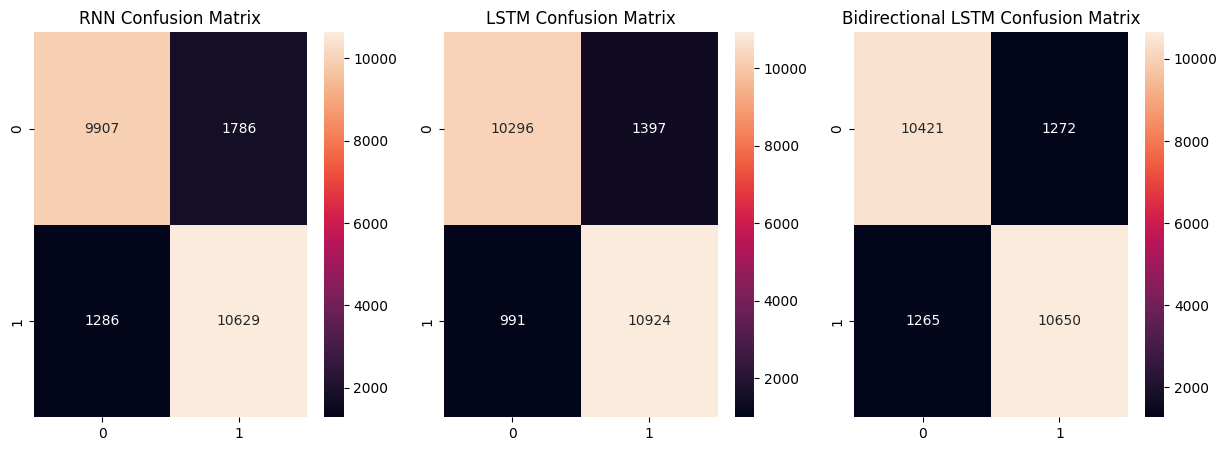

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrices for each model
conf_matrix_rnn = confusion_matrix(y_test, rnn.predict(X_test) > 0.5)
conf_matrix_lstm = confusion_matrix(y_test, lstm.predict(X_test) > 0.5)
conf_matrix_bid = confusion_matrix(y_test, bid.predict(X_test) > 0.5)

# Plot heatmaps of the confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', ax=ax[0])
ax[0].title.set_text('RNN Confusion Matrix')

sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', ax=ax[1])
ax[1].title.set_text('LSTM Confusion Matrix')

sns.heatmap(conf_matrix_bid, annot=True, fmt='d', ax=ax[2])
ax[2].title.set_text('Bidirectional LSTM Confusion Matrix')

plt.show()


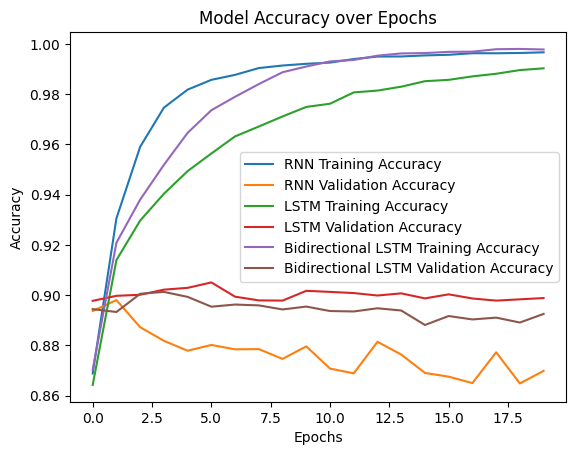

In [ ]:
# Plotting accuracy over epochs
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_bid.history['accuracy'], label='Bidirectional LSTM Training Accuracy')
plt.plot(history_bid.history['val_accuracy'], label='Bidirectional LSTM Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.show()


This assignment establishes a foundational approach towards using neural networks for fake news detection. The preprocessing steps and data handling methods are well-executed, setting the stage for effective model training and evaluation. Future enhancements focusing on detailed model architecture, evaluation, and advanced text representation techniques will further strengthen the system’s capability to discern fake news accurately.